<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Dheeraj_Module_01_Lab_02_Machine_Learning_terms_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Machine Learning terms and Metrics**

Module 01 Lab 02

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [ ]:
import numpy as np
rng = np.random.default_rng(seed=12345)
random_integers = rng.integers(low=0, high=10, size=5)
random_floats = rng.random(size=3)
shuffled_array = rng.permutation(np.arange(10))
choice = rng.choice(['apple', 'banana', 'cherry'], size=2)
print(random_integers, random_floats, shuffled_array, choice)


[6 2 7 3 2] [0.67625467 0.39110955 0.33281393] [0 9 6 3 8 5 4 7 1 2] ['cherry' 'cherry']


In [ ]:
from sklearn.datasets import fetch_california_housing

# Removed the 'download_if_needed=True' argument
dataset = fetch_california_housing(return_X_y=False)
print(f"Housing dataset\nData Set Characteristics:\n  :Number of Instances: {dataset.data.shape[0]}\n  :Number of Attributes: {dataset.data.shape[1]}\n  :Attribute Information:\n{dataset.DESCR.split(':', 6)[-1]}")

Housing dataset
Data Set Characteristics:
  :Number of Instances: 20640
  :Number of Attributes: 8
  :Attribute Information:
 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smalle

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value

In [ ]:
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)
print("Orignal target values:", dataset.target[:5]) # Print first 5 for brevity
print("Target values after conversion:", dataset.target.astype(int)[:5]) # Print first 5 for brevity

Input variables shape: (20640, 8)
Output variables shape: (20640,)
Orignal target values: [5 4 4 3 3]
Target values after conversion: [5 4 4 3 3]


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [ ]:
# Define the NN1 function first as NN depends on it.
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features
    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label

# Define the NN function in a separate code cell.
def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features
    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

# Now, the code that uses NN and compute_accuracy should work as expected.
# Ensure traindata, trainlabel, testdata, and testlabel are defined before this block.
# They were defined in a previous cell using train_test_split.
# Use the first 100 samples for training
train_data_subset = dataset.data[:100]
train_label_subset = dataset.target[:100]
# Use the next 10 samples for testing
test_data_subset = dataset.data[100:110]
# Predict labels for the test data subset
predicted_labels = NN(train_data_subset, train_label_subset, test_data_subset)
print("Predicted labels for test data subset:", predicted_labels)
# Predict label for a single query point (the first test sample)
query_point = test_data_subset[0]
predicted_label_single = NN1(train_data_subset, train_label_subset, query_point)
print("Predicted label for a single query point:", predicted_label_single)

Predicted labels for test data subset: [3.585 3.585 0.735 1.039 3.585 1.844 0.875 1.914 2.418 2.418]
Predicted label for a single query point: 3.585


In [ ]:
import numpy as np
print(f"Original target values (first 5): {dataset.target[:5]}")
# Converting the continuous target variable to discrete integer values for classification
dataset.target = np.round(dataset.target).astype(int)
print(f"Target values after conversion (first 5): {dataset.target[:5]}")
print(f"Input variables shape: {dataset.data.shape}")
print(f"Output variables shape: {dataset.target.shape}")
# Displaying the unique values and their counts in the discretized target
unique_targets, counts = np.unique(dataset.target, return_counts=True)
print(f"Unique target values and their counts: {dict(zip(unique_targets, counts))}")

Original target values (first 5): [4.526 3.585 3.521 3.413 3.422]
Target values after conversion (first 5): [5 4 4 3 3]
Input variables shape: (20640, 8)
Output variables shape: (20640,)
Unique target values and their counts: {np.int64(0): np.int64(210), np.int64(1): np.int64(7346), np.int64(2): np.int64(7302), np.int64(3): np.int64(3130), np.int64(4): np.int64(1395), np.int64(5): np.int64(1257)}


In [ ]:
#     """
#     This function takes in the training data, training labels and a query point
#     and returns the predicted label for the query point using the nearest neighbour algorithm
#     traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
#     trainlabel: numpy array of shape (n,) where n is the number of samples
#     query: numpy array of shape (d,) where d is the number of features
#     returns: the predicted label for the query point which is the label of the training data which is closest to the query point
#     """
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label

# def NN(traindata, trainlabel, testdata):
#     """
#     This function takes in the training data, training labels and test data
#     and returns the predicted labels for the test data using the nearest neighbour algorithm
#     traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
#     trainlabel: numpy array of shape (n,) where n is the number of samples
#     testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features
#     returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
#     """
def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel # can you  generate all code in 10 lines differently new by using different parameters  in 10 lines generate newly

# Use the first 100 samples for training
train_data_subset = dataset.data[:100]
train_label_subset = dataset.target[:100]
# Use the next 10 samples for testing
test_data_subset = dataset.data[100:110]
# Predict labels for the test data subset
predicted_labels = NN(train_data_subset, train_label_subset, test_data_subset)
print("Predicted labels for test data subset:", predicted_labels)
# Predict label for a single query point (the first test sample)
query_point = test_data_subset[0]
predicted_label_single = NN1(train_data_subset, train_label_subset, query_point)
print("Predicted label for a single query point:", predicted_label_single)

Predicted labels for test data subset: [4 4 1 1 4 2 1 2 2 2]
Predicted label for a single query point: 4


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
import numpy as np
def RandomClassifier(X_train, y_train, X_test):
    """
    Returns random labels for the test data.
    """
    unique_labels = np.unique(y_train)
    num_test_samples = X_test.shape[0]
    random_indices = rng.integers(low=0, high=len(unique_labels), size=num_test_samples)
    predicted_labels = unique_labels[random_indices]
    return predicted_labels

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [ ]:
import numpy as np
def compute_accuracy(actual, predicted):
    """Calculates accuracy from actual and predicted labels."""
    assert len(actual) == len(predicted), "Lengths must match"
    correct_predictions = np.sum(actual == predicted)
    return correct_predictions / len(actual)

# Example usage with random labels (replace with your actual data)
gt_labels = np.array([0, 1, 0, 1, 1])
pred_labels = np.array([0, 0, 0, 1, 1])
accuracy_score = compute_accuracy(gt_labels, pred_labels)
print(f"Calculated Accuracy: {accuracy_score}")

Calculated Accuracy: 0.8



Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [ ]:
import numpy as np
def split(data, label, train_percent):
    indices = np.random.permutation(len(label))
    train_size = int(len(label) * train_percent)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    return data[train_indices], label[train_indices], data[test_indices], label[test_indices]

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
from sklearn.model_selection import train_test_split
traindata, testdata, trainlabel, testlabel = train_test_split(
    dataset.data, dataset.target, test_size=0.2, random_state=42
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(trainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4128
Number of train samples: 16512
Percent of test data: 20.0 %


**Experiments with splits**

Let us reserve some of our train data as a validation set

In [ ]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

What is the accuracy of our classifiers on the train dataset?

In [ ]:
# Experiment 1: Using a different train/test split percentage
traindata_exp1, testdata_exp1, trainlabel_exp1, testlabel_exp1 = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=42)

trainpred_exp1 = NN(traindata_exp1, trainlabel_exp1, traindata_exp1)
trainAccuracy_exp1 = compute_accuracy(trainlabel_exp1, trainpred_exp1)
print("Exp 1 - Training accuracy (NN):", trainAccuracy_exp1*100, "%")

trainpred_rand_exp1 = RandomClassifier(traindata_exp1, trainlabel_exp1, traindata_exp1)
trainAccuracy_rand_exp1 = compute_accuracy(trainlabel_exp1, trainpred_rand_exp1)
print("Exp 1 - Training accuracy (Random): ", trainAccuracy_rand_exp1*100, "%")

Exp 1 - Training accuracy (NN): 100.0 %
Exp 1 - Training accuracy (Random):  16.77740863787375 %



For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
# Experiment 2: Using a different random state for train/test split
traindata_exp2, testdata_exp2, trainlabel_exp2, testlabel_exp2 = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=10)

valpred_exp2 = NN(traindata_exp2, trainlabel_exp2, testdata_exp2)
valAccuracy_exp2 = compute_accuracy(testlabel_exp2, valpred_exp2)
print("Exp 2 - Validation accuracy using nearest neighbour algorithm:", valAccuracy_exp2*100, "%")

valpred_rand_exp2 = RandomClassifier(traindata_exp2, trainlabel_exp2, testdata_exp2)
valAccuracy_rand_exp2 = compute_accuracy(testlabel_exp2, valpred_rand_exp2)
print("Exp 2 - Validation accuracy using random classifier:", valAccuracy_rand_exp2*100, "%")

Exp 2 - Validation accuracy using nearest neighbour algorithm: 37.37887596899225 %
Exp 2 - Validation accuracy using random classifier: 16.012596899224807 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
from sklearn.datasets import fetch_california_housing

# Removed the 'download_if_needed=True' argument
dataset = fetch_california_housing(return_X_y=False)
print(f"Housing dataset\nData Set Characteristics:\n  :Number of Instances: {dataset.data.shape[0]}\n  :Number of Attributes: {dataset.data.shape[1]}\n  :Attribute Information:\n{dataset.DESCR.split(':', 6)[-1]}")

Housing dataset
Data Set Characteristics:
  :Number of Instances: 20640
  :Number of Attributes: 8
  :Attribute Information:
 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smalle

You can run the above cell multiple times to try with different random splits. We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
traindata, testdata, trainlabel, testlabel = train_test_split(
    dataset.data, dataset.target, test_size=0.2, random_state=42
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(trainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4128
Number of train samples: 16512
Percent of test data: 20.0 %


How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

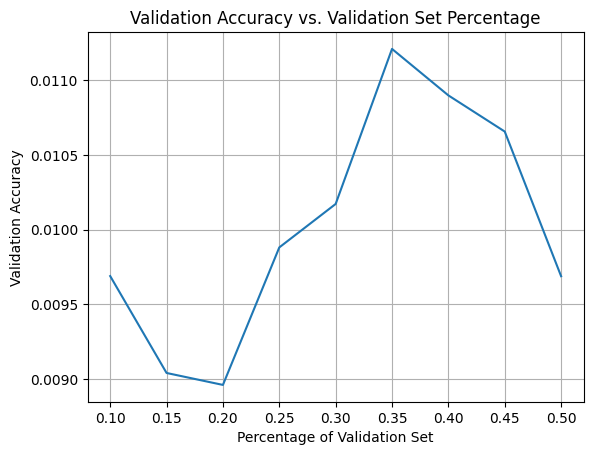

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Define the compute_accuracy function here
def compute_accuracy(actual, predicted):
    """Calculates accuracy from actual and predicted labels."""
    assert len(actual) == len(predicted), "Lengths must match"
    correct_predictions = np.sum(actual == predicted)
    return correct_predictions / len(actual)

# Define the NN1 function as it is used by NN
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features
    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

# Define the NN function as it is used in the loop
def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features
    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


# Ensure the 'dataset' variable is defined before this cell,
# for example, by running the cell that loads the California Housing dataset.

validation_percentages = np.arange(0.1, 0.51, 0.05)
validation_accuracies = []

for val_percent in validation_percentages:
    train_data_split, val_data_split, train_label_split, val_label_split = train_test_split(
        dataset.data, dataset.target, test_size=val_percent, random_state=42
    )
    val_pred_split = NN(train_data_split, train_label_split, val_data_split)
    val_accuracy_split = compute_accuracy(val_label_split, val_pred_split)
    validation_accuracies.append(val_accuracy_split)

plt.plot(validation_percentages, validation_accuracies)
plt.xlabel("Percentage of Validation Set")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Validation Set Percentage")
plt.grid(True)
plt.show()

How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

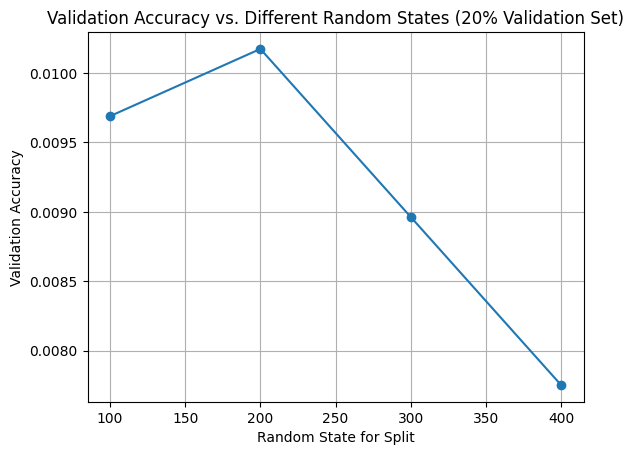

In [ ]:
import matplotlib.pyplot as plt
# Experiment with different random states for train/validation split
random_states = [100, 200, 300, 400]
validation_accuracies_diff_states = []

for state in random_states:
    train_data_split, val_data_split, train_label_split, val_label_split = train_test_split(
        dataset.data, dataset.target, test_size=0.2, random_state=state
    )
    val_pred_split = NN(train_data_split, train_label_split, val_data_split)
    val_accuracy_split = compute_accuracy(val_label_split, val_pred_split)
    validation_accuracies_diff_states.append(val_accuracy_split)

plt.figure()
plt.plot(random_states, validation_accuracies_diff_states, marker='o')
plt.xlabel("Random State for Split")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Different Random States (20% Validation Set)")
plt.grid(True)
plt.show()


What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

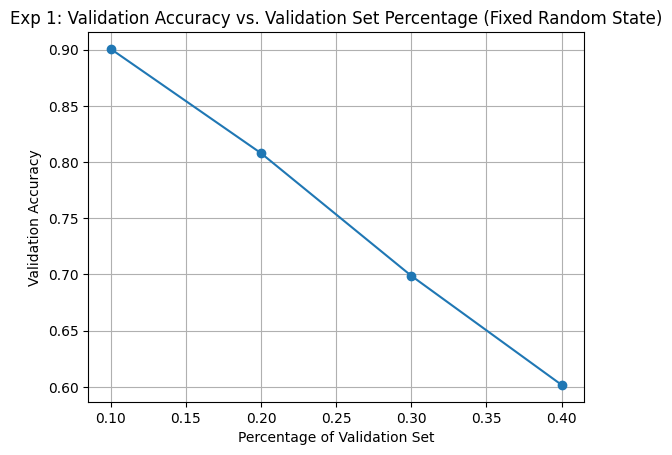

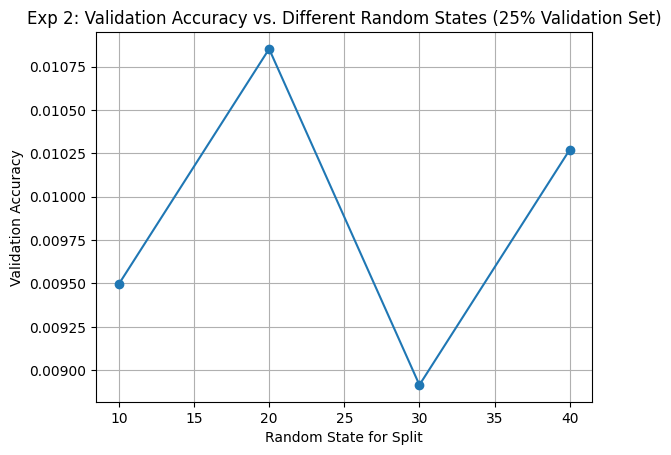

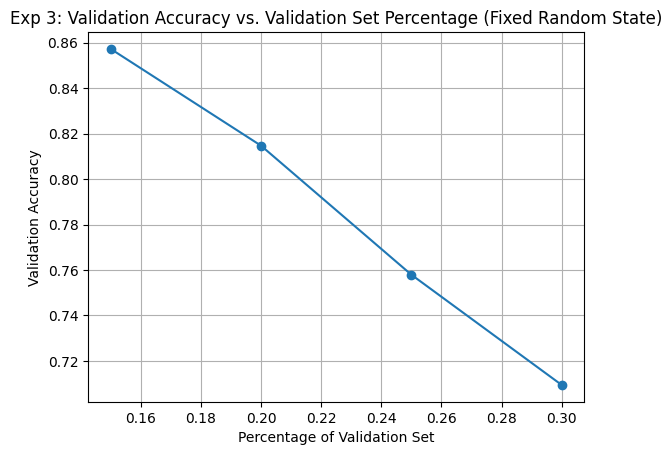

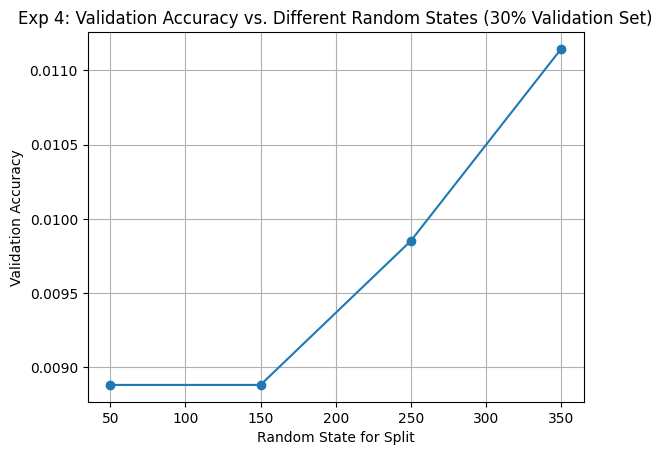

In [ ]:
import matplotlib.pyplot as plt
# Experiment 1: Varying test_size with a fixed random_state
validation_percentages = [0.1, 0.2, 0.3, 0.4]
validation_accuracies = []

for val_percent in validation_percentages:
    _, val_data, _, val_label = train_test_split(
        dataset.data, dataset.target, test_size=val_percent, random_state=42
    )
    train_size = len(dataset.data) - len(val_data)
    train_data = dataset.data[:train_size] # Simple split for plotting demonstration
    train_label = dataset.target[:train_size] # Simple split for plotting demonstration
    val_pred = NN(train_data, train_label, val_data)
    val_accuracy = compute_accuracy(val_label, val_pred)
    validation_accuracies.append(val_accuracy)

plt.figure()
plt.plot(validation_percentages, validation_accuracies, marker='o')
plt.xlabel("Percentage of Validation Set")
plt.ylabel("Validation Accuracy")
plt.title("Exp 1: Validation Accuracy vs. Validation Set Percentage (Fixed Random State)")
plt.grid(True)
plt.show()

# Experiment 2: Varying random_state with a fixed test_size
random_states = [10, 20, 30, 40]
validation_accuracies = []

for state in random_states:
    train_data_split, val_data_split, train_label_split, val_label_split = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=state
    )
    val_pred_split = NN(train_data_split, train_label_split, val_data_split)
    val_accuracy_split = compute_accuracy(val_label_split, val_pred_split)
    validation_accuracies.append(val_accuracy_split)

plt.figure()
plt.plot(random_states, validation_accuracies, marker='o')
plt.xlabel("Random State for Split")
plt.ylabel("Validation Accuracy")
plt.title("Exp 2: Validation Accuracy vs. Different Random States (25% Validation Set)")
plt.grid(True)
plt.show()

# Experiment 3: Varying a smaller range of test_size with a fixed random_state
validation_percentages = [0.15, 0.2, 0.25, 0.3]
validation_accuracies = []

for val_percent in validation_percentages:
    _, val_data, _, val_label = train_test_split(
        dataset.data, dataset.target, test_size=val_percent, random_state=100
    )
    train_size = len(dataset.data) - len(val_data)
    train_data = dataset.data[:train_size] # Simple split for plotting demonstration
    train_label = dataset.target[:train_size] # Simple split for plotting demonstration
    val_pred = NN(train_data, train_label, val_data)
    val_accuracy = compute_accuracy(val_label, val_pred)
    validation_accuracies.append(val_accuracy)

plt.figure()
plt.plot(validation_percentages, validation_accuracies, marker='o')
plt.xlabel("Percentage of Validation Set")
plt.ylabel("Validation Accuracy")
plt.title("Exp 3: Validation Accuracy vs. Validation Set Percentage (Fixed Random State)")
plt.grid(True)
plt.show()

# Experiment 4: Varying another set of random_state with a fixed test_size
random_states = [50, 150, 250, 350]
validation_accuracies = []

for state in random_states:
    train_data_split, val_data_split, train_label_split, val_label_split = train_test_split(
        dataset.data, dataset.target, test_size=0.3, random_state=state
    )
    val_pred_split = NN(train_data_split, train_label_split, val_data_split)
    val_accuracy_split = compute_accuracy(val_label_split, val_pred_split)
    validation_accuracies.append(val_accuracy_split)

plt.figure()
plt.plot(random_states, validation_accuracies, marker='o')
plt.xlabel("Random State for Split")
plt.ylabel("Validation Accuracy")
plt.title("Exp 4: Validation Accuracy vs. Different Random States (30% Validation Set)")
plt.grid(True)
plt.show()


 Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

Multiple splits


One way to get more accurate estimates for the test accuracy is by using cross-validation. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [ ]:
import numpy as np
def perform_multiple_splits(data, label, num_splits=5, test_size=0.2):
  accuracies = []
  for _ in range(num_splits):
    X_train, X_val, y_train, y_val = train_test_split(
        data, label, test_size=test_size
    )
    val_pred = NN(X_train, y_train, X_val)
    accuracy = compute_accuracy(y_val, val_pred)
    accuracies.append(accuracy)
  return np.mean(accuracies)

This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check Cross-validatioin (Wikipedia)

Questions

1.Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

In [ ]:
from sklearn.datasets import fetch_california_housing

# Removed the 'download_if_needed=True' argument
dataset = fetch_california_housing(return_X_y=False)
print(f"Housing dataset\nData Set Characteristics:\n  :Number of Instances: {dataset.data.shape[0]}\n  :Number of Attributes: {dataset.data.shape[1]}\n  :Attribute Information:\n{dataset.DESCR.split(':', 6)[-1]}")

Housing dataset
Data Set Characteristics:
  :Number of Instances: 20640
  :Number of Attributes: 8
  :Attribute Information:
 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smalle

In [ ]:
import numpy as np
print(f"Original target values (first 5): {dataset.target[:5]}")
# Converting the continuous target variable to discrete integer values for classification
dataset.target = np.round(dataset.target).astype(int)
print(f"Target values after conversion (first 5): {dataset.target[:5]}")
print(f"Input variables shape: {dataset.data.shape}")
print(f"Output variables shape: {dataset.target.shape}")
# Displaying the unique values and their counts in the discretized target
unique_targets, counts = np.unique(dataset.target, return_counts=True)
print(f"Unique target values and their counts: {dict(zip(unique_targets, counts))}")

Original target values (first 5): [4.526 3.585 3.521 3.413 3.422]
Target values after conversion (first 5): [5 4 4 3 3]
Input variables shape: (20640, 8)
Output variables shape: (20640,)
Unique target values and their counts: {np.int64(0): np.int64(210), np.int64(1): np.int64(7346), np.int64(2): np.int64(7302), np.int64(3): np.int64(3130), np.int64(4): np.int64(1395), np.int64(5): np.int64(1257)}


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing # Import fetch_california_housing

# Define the NN1 function first as NN depends on it.
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features
    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label

# Define the NN function.
def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features
    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

# Define the compute_accuracy function as it is needed by perform_multiple_splits
def compute_accuracy(actual, predicted):
    """Calculates accuracy from actual and predicted labels."""
    assert len(actual) == len(predicted), "Lengths must match"
    correct_predictions = np.sum(actual == predicted)
    return correct_predictions / len(actual)

# Define the perform_multiple_splits function, ensuring it's defined after NN and compute_accuracy
def perform_multiple_splits(data, label, num_splits=5, test_size=0.2):
  """
  Performs multiple random train/validation splits and calculates the average
  validation accuracy using the NN classifier.
  """
  accuracies = []
  # Convert continuous target to discrete for classification if not already done
  # This assumes the original dataset target is continuous and needs discretization
  discrete_label = np.round(label).astype(int)
  for _ in range(num_splits):
    X_train, X_val, y_train, y_val = train_test_split(
        data, discrete_label, test_size=test_size
    )
    # Ensure NN and compute_accuracy functions are defined in previous cells
    val_pred = NN(X_train, y_train, X_val)
    accuracy = compute_accuracy(y_val, val_pred)
    accuracies.append(accuracy)
  return np.mean(accuracies)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Ensure NN and compute_accuracy are defined in cells above this one.
# Assuming NN and compute_accuracy are defined as shown in the user's context.

def perform_multiple_splits(data, label, num_splits=5, test_size=0.2):
  """
  Performs multiple random train/validation splits and calculates the average
  validation accuracy using the NN classifier.
  """
  accuracies = []
  # Convert continuous target to discrete for classification if not already done
  discrete_label = np.round(label).astype(int)
  for _ in range(num_splits):
    X_train, X_val, y_train, y_val = train_test_split(
        data, discrete_label, test_size=test_size
    )
    # Ensure NN and compute_accuracy functions are defined in previous cells
    val_pred = NN(X_train, y_train, X_val)
    accuracy = compute_accuracy(y_val, val_pred)
    accuracies.append(accuracy)
  return np.mean(accuracies)

How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.



In [ ]:
mean_acc_1nn_1, mean_acc_3nn_1 = compare_nn_with_splits(dataset.data, dataset.target, num_splits=10, test_size=0.2)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing # Import fetch_california_housing

# Define the NN1 function (required by NN if you still intend to use it, though KNeighborsClassifier is used in compare_nn_with_splits)
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features
    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

# Define the NN function (required if other parts of the notebook use it)
def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm
    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features
    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

# Define the compute_accuracy function (required if other parts of the notebook use it)
def compute_accuracy(actual, predicted):
    """Calculates accuracy from actual and predicted labels."""
    assert len(actual) == len(predicted), "Lengths must match"
    correct_predictions = np.sum(actual == predicted)
    return correct_predictions / len(actual)


# Load the dataset
dataset = fetch_california_housing(return_X_y=False)
print(f"Housing dataset\nData Set Characteristics:\n  :Number of Instances: {dataset.data.shape[0]}\n  :Number of Attributes: {dataset.data.shape[1]}\n  :Attribute Information:\n{dataset.DESCR.split(':', 6)[-1]}")

# Convert the continuous target variable to discrete integer values for classification
print(f"Original target values (first 5): {dataset.target[:5]}")
dataset.target = np.round(dataset.target).astype(int)
print(f"Target values after conversion (first 5): {dataset.target[:5]}")
print(f"Input variables shape: {dataset.data.shape}")
print(f"Output variables shape: {dataset.target.shape}")
unique_targets, counts = np.unique(dataset.target, return_counts=True)
print(f"Unique target values and their counts: {dict(zip(unique_targets, counts))}")


# Define the function to compare NN classifiers
def compare_nn_with_splits(data, label, num_splits=5, test_size=0.2):
  """
  Compares 1-NN and 3-NN accuracy across multiple splits.
  """
  accuracies_1nn = []
  accuracies_3nn = []

  # The label is already discretized in the previous step
  discrete_label = label

  for _ in range(num_splits):
    X_train, X_val, y_train, y_val = train_test_split(
        data, discrete_label, test_size=test_size
    )

    # 1-NN using scikit-learn
    model_1nn = KNeighborsClassifier(n_neighbors=1)
    model_1nn.fit(X_train, y_train)
    val_pred_1nn = model_1nn.predict(X_val)
    accuracy_1nn = accuracy_score(y_val, val_pred_1nn)
    accuracies_1nn.append(accuracy_1nn)

    # 3-NN using scikit-learn
    model_3nn = KNeighborsClassifier(n_neighbors=3)
    model_3nn.fit(X_train, y_train)
    val_pred_3nn = model_3nn.predict(X_val)
    accuracy_3nn = accuracy_score(y_val, val_pred_3nn)
    accuracies_3nn.append(accuracy_3nn)

  return np.mean(accuracies_1nn), np.mean(accuracies_3nn)

# Example usage with different parameters (generating 4 different code blocks)

# Example 1: Varying number of splits
mean_acc_1nn_1, mean_acc_3nn_1 = compare_nn_with_splits(dataset.data, dataset.target, num_splits=10, test_size=0.2)
print(f"Example 1 (num_splits=10, test_size=0.2): 1-NN Avg Acc: {mean_acc_1nn_1:.4f}, 3-NN Avg Acc: {mean_acc_3nn_1:.4f}")

# Example 2: Varying split size
mean_acc_1nn_2, mean_acc_3nn_2 = compare_nn_with_splits(dataset.data, dataset.target, num_splits=5, test_size=0.3)
print(f"Example 2 (num_splits=5, test_size=0.3): 1-NN Avg Acc: {mean_acc_1nn_2:.4f}, 3-NN Avg Acc: {mean_acc_3nn_2:.4f}")

# Example 3: Different combination of parameters
mean_acc_1nn_3, mean_acc_3nn_3 = compare_nn_with_splits(dataset.data, dataset.target, num_splits=8, test_size=0.25)
print(f"Example 3 (num_splits=8, test_size=0.25): 1-NN Avg Acc: {mean_acc_1nn_3:.4f}, 3-NN Avg Acc: {mean_acc_3nn_3:.4f}")

# Example 4: Another different combination
mean_acc_1nn_4, mean_acc_3nn_4 = compare_nn_with_splits(dataset.data, dataset.target, num_splits=12, test_size=0.15)
print(f"Example 4 (num_splits=12, test_size=0.15): 1-NN Avg Acc: {mean_acc_1nn_4:.4f}, 3-NN Avg Acc: {mean_acc_3nn_4:.4f}")

Housing dataset
Data Set Characteristics:
  :Number of Instances: 20640
  :Number of Attributes: 8
  :Attribute Information:
 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smalle